#### Create Model

In [4]:
from keras import layers, models, losses, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(1-0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.RMSprop(lr=0.0001),
    metrics=["acc"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________


----
#### Creating Generators for Dataset

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/validation"),
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



----
#### Fitting Models Using a Fit-Generator

In [5]:
import datetime
import pickle

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)
history = history.history
filename = "cats_vs_dogs_{}".format(datetime.datetime.utcnow().strftime("%Y-%m-%d_%H%M"))
model.save("models/{}.h5".format(filename))
print("saved model: {}.h5".format(filename))
with open("models/{}.hist".format(filename), "wb+") as file:
    pickle.dump(history, file)
print("saved history: {}.hist".format(filename))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 59s 590ms/step - loss: 0.6928 - acc: 0.5138 - val_loss: 0.6823 - val_acc: 0.5565
Epoch 2/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6755 - acc: 0.5706 - val_loss: 0.6526 - val_acc: 0.6044
Epoch 3/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6564 - acc: 0.6050 - val_loss: 0.6387 - val_acc: 0.6250
Epoch 4/100
100/100 [==============================] - 26s 265ms/step - loss: 0.6383 - acc: 0.6294 - val_loss: 0.6118 - val_acc: 0.6643
Epoch 5/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6247 - acc: 0.6516 - val_loss: 0.6081 - val_acc: 0.6529
Epoch 6/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6139 - acc: 0.6681 - val_loss: 0.7819 - val_acc: 0.5457
Epoch 7/100
100/100 [==============================] - 26s 259ms/step - loss: 0.5897 - acc: 0.6875 - val_loss: 0.5683 - val_acc: 0.7043


In [6]:
import pickle

filename = "cats_vs_dogs_2019-07-16_0541"
model = models.load_model("models/{}.h5".format(filename))
with open("models/{}.hist".format(filename), "rb") as file:
    history = pickle.load(file)
print("loaded {}".format(filename))

Instructions for updating:
Use tf.cast instead.
loaded cats_vs_dogs_2019-07-16_0541



----
#### Plotting Loss & Accuracy

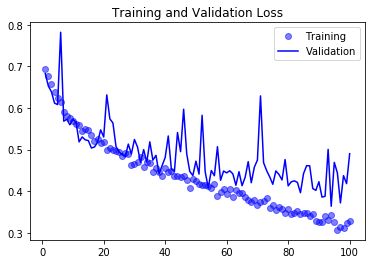

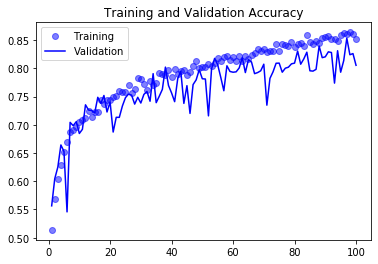

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(history["acc"])+1)

plt.plot(epochs, history["loss"], "bo", label="Training", alpha=0.5)
plt.plot(epochs, history["val_loss"], "b", label="Validation")
plt.title("Training and Validation Loss")
plt.legend()

plt.savefig("../../docs/notes/img/convnetFromScratch_Loss.png")
plt.figure()

plt.plot(epochs, history["acc"], "bo", label="Training", alpha=0.5)
plt.plot(epochs, history["val_acc"], "b", label="Validation")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.savefig("../../docs/notes/img/convnetFromScratch_Accuracy.png")
plt.show()


----
#### Evaluate Sample

In [9]:
from keras.preprocessing import image

test_generator = test_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/test"),
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)
test_loss, test_acc = model.evaluate_generator(
    test_generator,
    steps=50
)

print("Test Set Accuracy: {} (Loss: {})".format(test_acc, test_loss))

Found 1000 images belonging to 2 classes.
Test Set Accuracy: 0.81200000166893 (Loss: 0.5148205164074898)


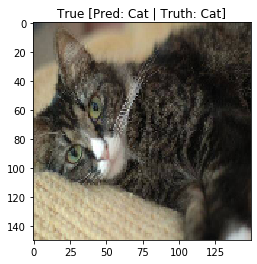

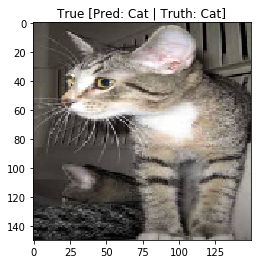

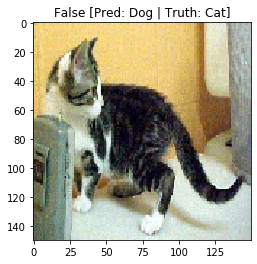

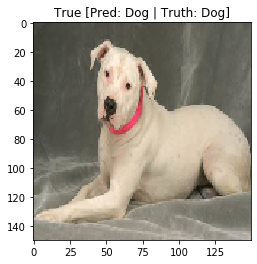

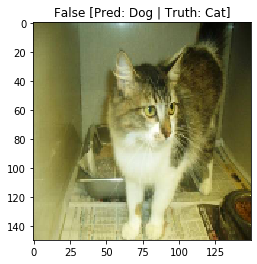

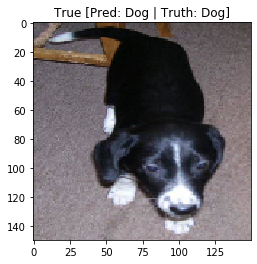

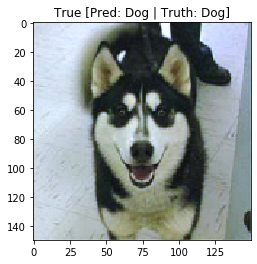

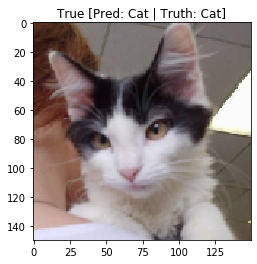

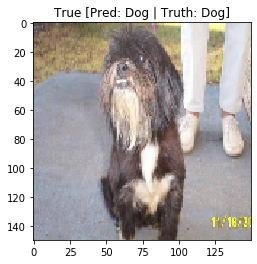

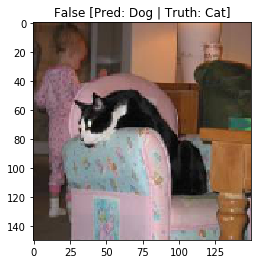

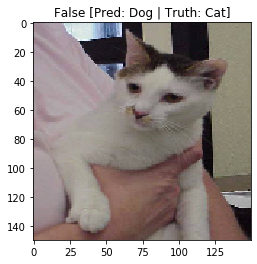

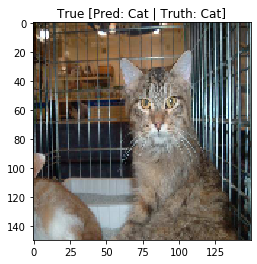

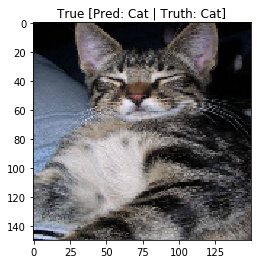

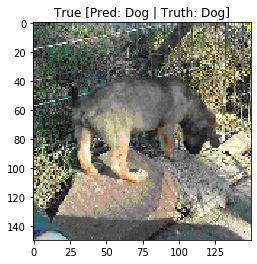

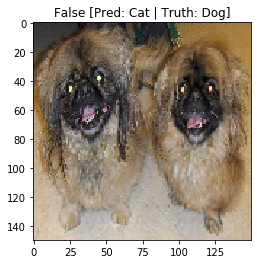

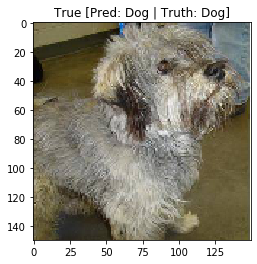

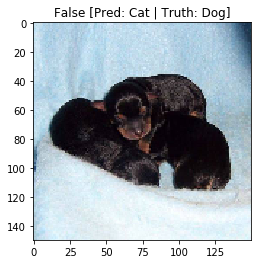

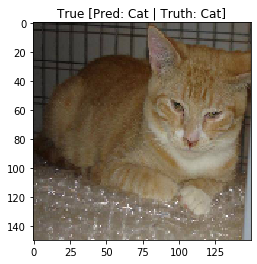

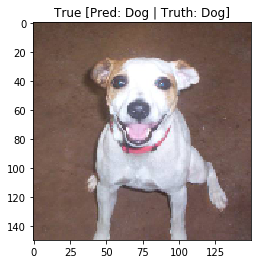

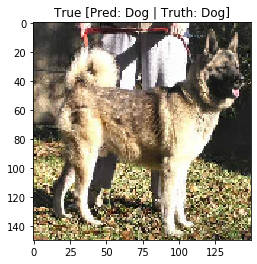

In [26]:
test_batch = test_generator.next()
images = test_batch[0]
true_labels = test_batch[1]
predictions = model.predict(images)

catdog = ["Cat", "Dog"]
for i in range(0,len(images)):
    img = images[i]
    truth = int(round(true_labels[i]))
    prediction = int(round(predictions[i].item()))
    
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(img))
    plt.title("{} [Pred: {} | Truth: {}]".format((prediction == truth),catdog[prediction], catdog[truth]))
plt.show()
